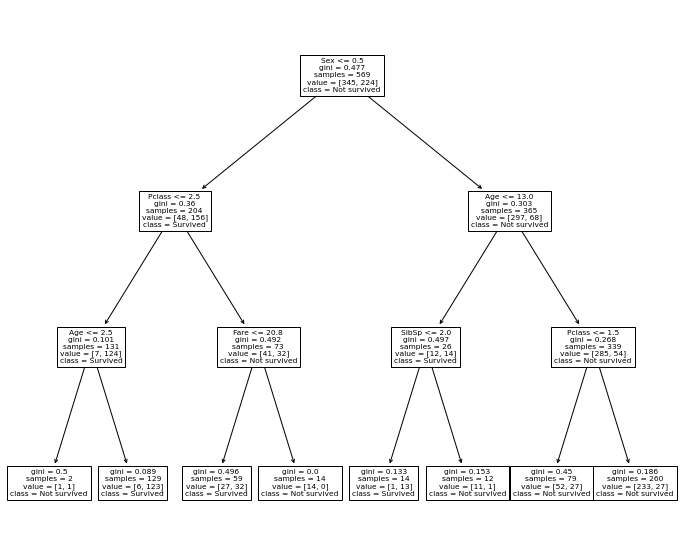

Accuracy score on Testing set:  0.7832167832167832


In [3]:
# Import packages
import pandas as pd
from sklearn.preprocessing import LabelEncoder          
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt 

# Read data
data = pd.read_csv(r'C:\Users\psahi\OneDrive\Desktop\ASSIGNMENT\ML\ML_HW1\train.csv')

# Check missing values
data.isnull().sum()
# Drop columns with too many missing values
data.drop('Cabin', axis=1, inplace=True)
# Drop data with missing values 
data.dropna(inplace=True)

# Inspect data
data.head()
# Transfrom attribute
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

# Decide variables to use
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

# train/test split (80/20)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)



# Train a decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt_model = dt.fit(x_train, y_train)

# Tree visualization
fig = plt.figure(figsize=(12, 10))
tree.plot_tree(dt_model, feature_names=list(X.columns), class_names=['Not survived', 'Survived'])
plt.show()

# Evaluate model performance on testing set
print("Accuracy score on Testing set: ", dt_model.score(x_test, y_test))
 